# Step 1 - Setting up the environment 

In [4]:
import sklearn
import numpy as np
import os

# this code segment was taken from the end to end ML code from Prof. Nguyen
np.random.seed(42) # constant output

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_ID = "boston-housing"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", PROJECT_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# Function to save fig
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

# Step 2 - Getting the data

In [5]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle



In [6]:
# Steps from here
# 1 - sign into kaggle
# 2 - click on 'my account'
# 3 - scroll down to the API section and click get token
# 4 - run this cell and click on the kaggle.json file that should now be in downloads

# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [7]:
!mkdir ~/.kaggle

In [8]:
# move the authentication key
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [9]:
# call the kaggle API to get the boston housing data
!kaggle datasets download -d vikrishnan/boston-house-prices

# unzip and move to proper folder
import zipfile
with zipfile.ZipFile('/content/boston-house-prices.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/datasets/housing')

  0% 0.00/12.8k [00:00<?, ?B/s]
100% 12.8k/12.8k [00:00<00:00, 20.5MB/s]


In [10]:
import pandas as pd

HOUSING_PATH = '/content/datasets/housing/'

# load housing data into a pandas dataframe
housing = pd.read_csv(HOUSING_PATH + 'housing.csv', delim_whitespace=True, header=None)

# rename the column names for convenience
housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [12]:
housing.describe()

# - CRIM     per capita crime rate by town
# - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
# - INDUS    proportion of non-retail business acres per town
# - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# - NOX      nitric oxides concentration (parts per 10 million)
# - RM       average number of rooms per dwelling
# - AGE      proportion of owner-occupied units built prior to 1940
# - DIS      weighted distances to five Boston employment centres
# - RAD      index of accessibility to radial highways
# - TAX      full-value property-tax rate per $10,000
# - PTRATIO  pupil-teacher ratio by town
# - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# - LSTAT    % lower status of the population
# - MEDV     Median value of owner-occupied homes in $1000's

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Saving figure attribute_histogram_plots


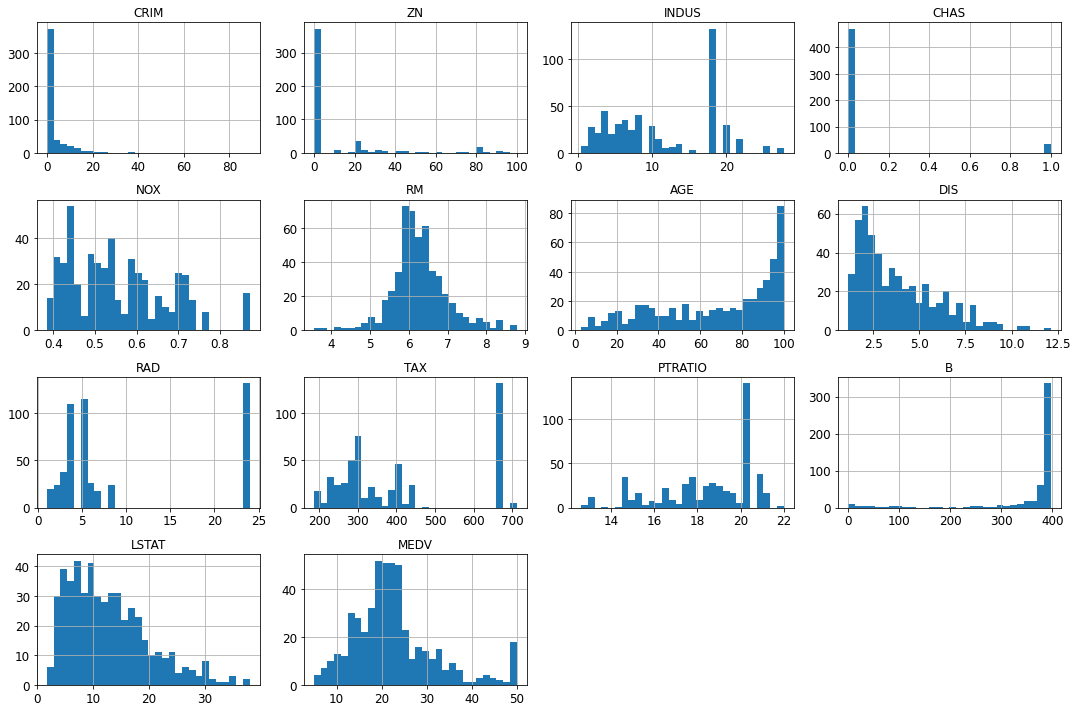

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=30, figsize=(15,10))
save_fig("attribute_histogram_plots")
plt.show()

In [14]:
# first insights - RM, NOX, MEDV, LSTAT, DIS seem to follow somewhat of a normal distribution
#                - most lots under 25,000 sq ft 

In [15]:
housing['DIS-ZOOM'] = pd.cut(housing['DIS'],
                                       bins=[1., 1.5, 2.0, 2.5, 3., np.inf],
                                       labels=[1, 2, 3, 4, 5])

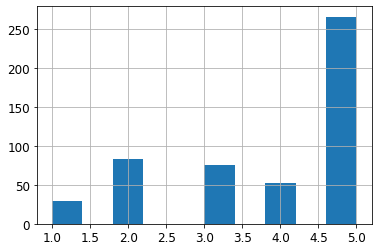

In [16]:
housing['DIS-ZOOM'].hist()

In [17]:
housing['MEDV-CAT'] = pd.cut(housing['MEDV'],
                                       bins=[0., 10, 20, 30, 40., np.inf],
                                       labels=[1, 2, 3, 4, 5])

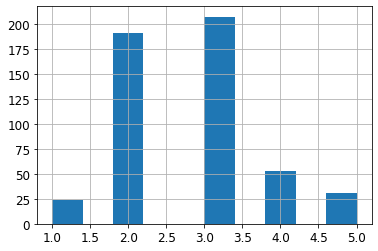

In [18]:
housing['MEDV-CAT'].hist()

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['MEDV-CAT']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [20]:
strat_test_set['MEDV-CAT'].value_counts() / len(strat_test_set)

3    0.411765
2    0.372549
4    0.107843
5    0.058824
1    0.049020
Name: MEDV-CAT, dtype: float64

In [21]:
housing['MEDV-CAT'].value_counts() / len(housing)

3    0.409091
2    0.377470
4    0.104743
5    0.061265
1    0.047431
Name: MEDV-CAT, dtype: float64

In [22]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("MEDV-CAT", axis=1, inplace=True)

# Step 3 - Discover and visualize the data to gain insights

In [23]:
# make copy of the train set
housing = strat_train_set.copy()

Saving figure median-value-vs-number-rooms-scatter


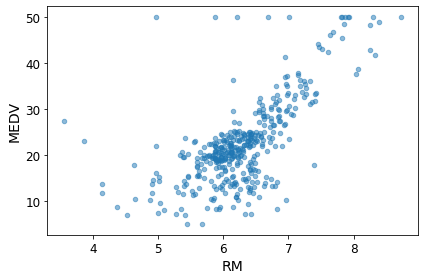

In [24]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.5)
save_fig("median-value-vs-number-rooms-scatter")

Saving figure median-value-vs-number-rooms-scatter


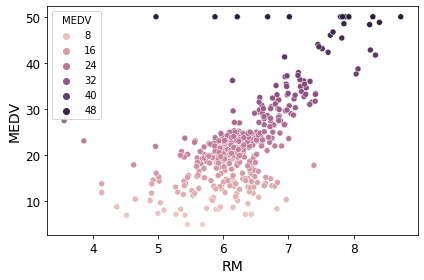

In [27]:
import seaborn as sns
sns.scatterplot(x="RM", y="MEDV", hue="MEDV",
                     data=housing)
save_fig("median-value-vs-number-rooms-scatter")

Saving figure median-value-vs-age-scatter


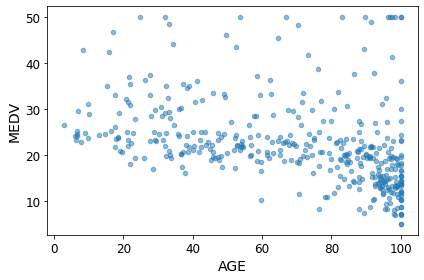

In [28]:
housing.plot(kind="scatter", x="AGE", y="MEDV", alpha=0.5)
save_fig("median-value-vs-age-scatter")

Saving figure median-value-vs-nox-scatter


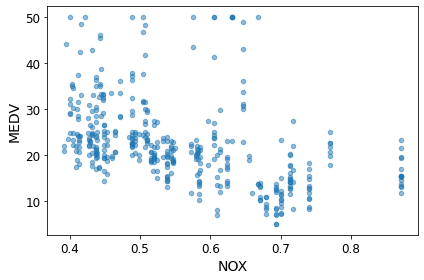

In [29]:
housing.plot(kind="scatter", x="NOX", y="MEDV", alpha=0.5)
save_fig("median-value-vs-nox-scatter")

In [30]:
# look at the entire correlation matrix
housing.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.203789,0.407701,-0.047228,0.418278,-0.226962,0.355102,-0.374443,0.611260,0.567792,0.288743,-0.339335,0.469413,-0.391283
ZN,-0.203789,1.000000,-0.535234,-0.020796,-0.511900,0.329177,-0.552113,0.661535,-0.323787,-0.335576,-0.374879,0.180656,-0.415362,0.375967
INDUS,0.407701,-0.535234,1.000000,0.055940,0.765763,-0.427184,0.640691,-0.704890,0.607606,0.744235,0.378730,-0.361714,0.613097,-0.499120
CHAS,-0.047228,-0.020796,0.055940,1.000000,0.096629,0.057491,0.090400,-0.099892,-0.011600,-0.033542,-0.130689,0.040382,-0.051001,0.183854
NOX,0.418278,-0.511900,0.765763,0.096629,1.000000,-0.336038,0.740609,-0.767043,0.611198,0.670252,0.163190,-0.377758,0.595718,-0.438384
RM,-0.226962,0.329177,-0.427184,0.057491,-0.336038,1.000000,-0.264507,0.242276,-0.241231,-0.327459,-0.344911,0.128249,-0.609371,0.679439
AGE,0.355102,-0.552113,0.640691,0.090400,0.740609,-0.264507,1.000000,-0.745570,0.485193,0.544165,0.244342,-0.262921,0.613834,-0.390075
DIS,-0.374443,0.661535,-0.704890,-0.099892,-0.767043,0.242276,-0.745570,1.000000,-0.501769,-0.547909,-0.216285,0.287711,-0.502064,0.266088
RAD,0.611260,-0.323787,0.607606,-0.011600,0.611198,-0.241231,0.485193,-0.501769,1.000000,0.904387,0.482028,-0.424323,0.507866,-0.381903
TAX,0.567792,-0.335576,0.744235,-0.033542,0.670252,-0.327459,0.544165,-0.547909,0.904387,1.000000,0.476530,-0.425326,0.568393,-0.477005


In [31]:
#define the matrix
corr_matrix = housing.corr()

Saving figure correlation heatmap


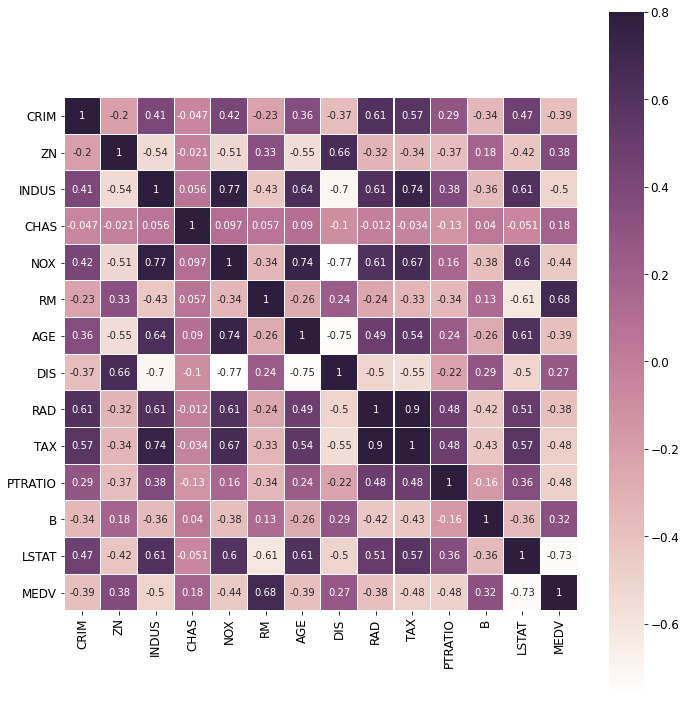

In [32]:
# plot a correlation matrix that is easier to read
import seaborn as sns
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(corr_matrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap=cmap,linecolor="white")
save_fig('correlation heatmap')

In [33]:
# look at how much each feature correlates to the house value 
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.679439
ZN         0.375967
B          0.324998
DIS        0.266088
CHAS       0.183854
RAD       -0.381903
AGE       -0.390075
CRIM      -0.391283
NOX       -0.438384
TAX       -0.477005
PTRATIO   -0.483569
INDUS     -0.499120
LSTAT     -0.734822
Name: MEDV, dtype: float64

Saving figure median-value-vs-lstat-scatter


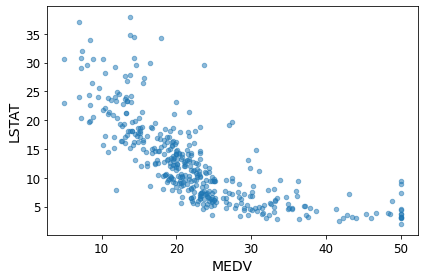

In [34]:
# LSTAT has a strong negative correlation so i'll plot that
housing.plot(kind="scatter", x="MEDV", y="LSTAT", alpha=0.5)
save_fig("median-value-vs-lstat-scatter")

In [35]:
# nitric concentration higher at older houses
housing['toxicity'] = housing['NOX']*housing['INDUS']

In [36]:
# add in the proportion of black residents per town
housing['Bk'] = np.sqrt(housing['B']/1000)+0.63

Saving figure correlation heatmap added features


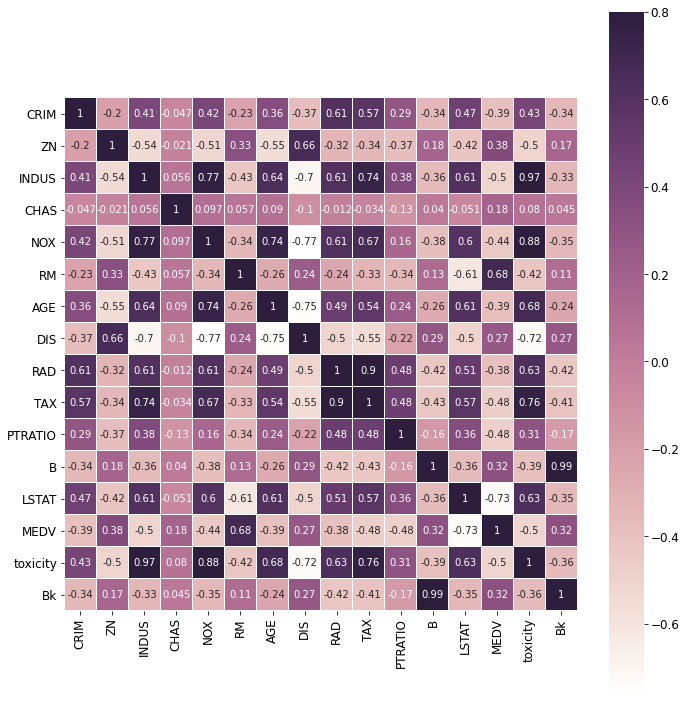

In [37]:
#update the matrix with new fields and plot correlations
corr_matrix = housing.corr()
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(corr_matrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap=cmap,linecolor="white")
save_fig('correlation heatmap added features')

Saving figure toxicity-tax-correlation


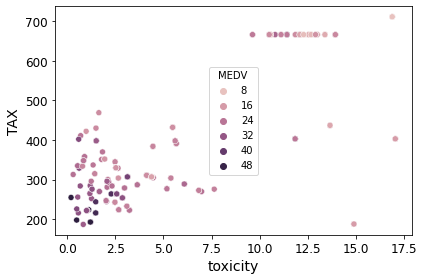

In [38]:
sns.scatterplot(x="toxicity", y="TAX", hue="MEDV",
                     data=housing)
save_fig("toxicity-tax-correlation")

# Prepare the data for Machine Learning algorithms

In [39]:
# Create the features and labels for training
housingTrain = strat_train_set.drop("MEDV", axis=1) # drop labels for training set
housing_labels = strat_train_set["MEDV"].copy()

In [40]:
# Check to see if there's any missing value in the data with .isnull()
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,DIS-ZOOM,toxicity,Bk


In [41]:
housing_num = housingTrain.copy()

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# imputer takes care of any null values and standard scaler will normalize the range of data
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [43]:
# make a copy of the normalized data
housing_prepared = housing_num_tr.copy()

In [44]:
# confirm that the training data has kept shape
print(housingTrain.shape)
print(housing_prepared.shape)

(404, 14)
(404, 14)


In [45]:
from sklearn.linear_model import LinearRegression

# ill first run the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
# this code is similar to the california housing colab file - which Professor Nguyen told me is acceptable to use

# let's try the full preprocessing pipeline on a few training instances
some_data = housingTrain.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = num_pipeline.fit_transform(some_data)
# Note here that you only use transform() instead of fit_tranform becausue you are not trying to learn any parameter (ie. median)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [19.6533608  22.14821143 20.38449687 38.06039119 12.22259911]


In [47]:
print("Labels:", list(some_labels))

Labels: [20.8, 20.0, 22.2, 32.2, 18.9]


In [48]:
#test the linear regression models root mean squared error
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.623863677024818

In [49]:
# the rsme could get better -> but for now test the mean absolute error for the lin_reg model
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

3.3513596602612186

In [50]:
# trying a decision tree regressor model
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [51]:
# overfit
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [52]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [53]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [3.45228804 4.62511701 3.94399822 4.30334527 4.22634594 3.9781277
 3.68507123 5.15608863 7.242289   3.95850351]
Mean: 4.457117454331532
Standard deviation: 1.034308581708406


In [54]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [3.92239871 4.92802881 3.83395252 4.51903222 4.91099026 4.20202812
 7.1069829  4.33874932 6.06270264 5.12846236]
Mean: 4.895332784502698
Standard deviation: 0.9651424546812375


In [55]:
# the rsme got worse with the deecision tree -> now I'll try a random forestt regressor

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [56]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.1516497636945962

In [57]:
# check that the training and validation sets have similar rsme - if not the data is overfit
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [1.95186937 3.59601502 2.80556811 2.85501291 2.41598646 2.88671487
 3.36392992 2.68247114 5.0708685  2.82396932]
Mean: 3.045240562080654
Standard deviation: 0.7999267268868874


In [58]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      3.045241
std       0.843197
min       1.951869
25%       2.713245
50%       2.839491
75%       3.244626
max       5.070868
dtype: float64

# Step 6 - Fine tuning the model

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [60]:
# find out what the best parameters of the model will be
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [61]:
# get the best estimator
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [62]:
cvres = grid_search.cv_results_
# zip() is to combine the column "mean_test_score" with struct "params"
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.928937947133652 {'max_features': 2, 'n_estimators': 3}
4.091901934474728 {'max_features': 2, 'n_estimators': 10}
3.740571668942306 {'max_features': 2, 'n_estimators': 30}
4.33687048182577 {'max_features': 4, 'n_estimators': 3}
3.6617527982587186 {'max_features': 4, 'n_estimators': 10}
3.449176237910236 {'max_features': 4, 'n_estimators': 30}
3.9239096281065553 {'max_features': 6, 'n_estimators': 3}
3.43049717404214 {'max_features': 6, 'n_estimators': 10}
3.207064973487456 {'max_features': 6, 'n_estimators': 30}
4.223209919400126 {'max_features': 8, 'n_estimators': 3}
3.4272353064356422 {'max_features': 8, 'n_estimators': 10}
3.069872966735432 {'max_features': 8, 'n_estimators': 30}
4.259358529438972 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.6795177861900448 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
4.048363634093977 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.7215523012399268 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [63]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()

X_test_prepared = num_pipeline.fit_transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [64]:
final_rmse

4.103656786283161

In [65]:
from scipy import stats

# get the 95% confidence interval
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([2.23374194, 5.35634157])